# Linear Regression Model

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df['Salary'].isna().sum()

np.int64(0)

In [6]:
df['YearsExperience'].isna().sum()

np.int64(0)

In [7]:
from sklearn.preprocessing import add_dummy_feature
from matplotlib import pyplot as plt

<strong>Visualizing the years of experience</strong>

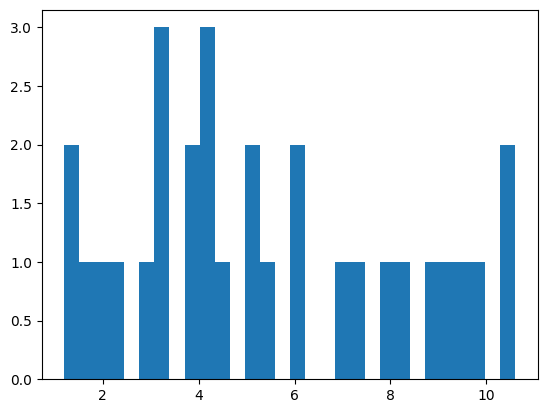

In [8]:
plt.hist(df['YearsExperience'], bins=30)
plt.show()

In [9]:
exp_category = pd.cut(df['YearsExperience'], bins=[0., 2.0, 4.0, 6.0, 8.0, 10.0, np.inf])
exp_category_sorted = exp_category.value_counts().sort_values()
print(exp_category_sorted)

YearsExperience
(10.0, inf]    2
(0.0, 2.0]     3
(6.0, 8.0]     4
(8.0, 10.0]    5
(2.0, 4.0]     8
(4.0, 6.0]     8
Name: count, dtype: int64


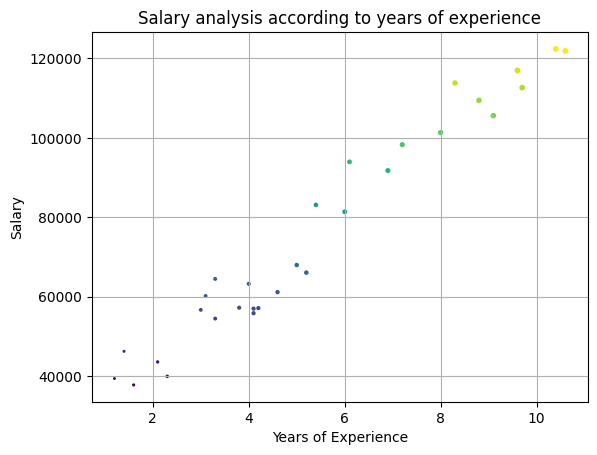

In [10]:
plt.scatter(df['YearsExperience'], df['Salary'],c=df['Salary'], s=df['YearsExperience'], alpha=1.0)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(visible=True)
plt.title("Salary analysis according to years of experience")
plt.show()

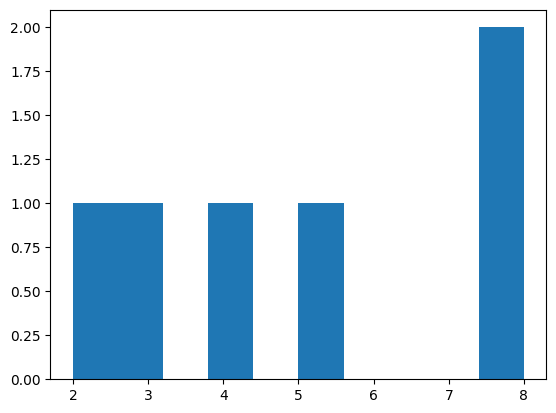

In [11]:
plt.hist(exp_category_sorted)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(df, test_size=0.4, stratify=exp_category)

In [14]:
print(train_set, test_set)  # since data is limited, used train_test ratio as 60:40

    Unnamed: 0  YearsExperience    Salary
15          15              5.0   67939.0
2            2              1.6   37732.0
13          13              4.2   57082.0
20          20              6.9   91739.0
28          28             10.4  122392.0
16          16              5.2   66030.0
24          24              8.8  109432.0
9            9              3.8   57190.0
27          27              9.7  112636.0
5            5              3.0   56643.0
12          12              4.1   56958.0
0            0              1.2   39344.0
19          19              6.1   93941.0
23          23              8.3  113813.0
7            7              3.3   54446.0
17          17              5.4   83089.0
10          10              4.0   63219.0
4            4              2.3   39892.0     Unnamed: 0  YearsExperience    Salary
26          26              9.6  116970.0
3            3              2.1   43526.0
8            8              3.3   64446.0
29          29             10.6  1

In [15]:
train_set_copy = train_set.copy()
# print(train_set_copy)
count_years_of_exp_trainingSet = train_set_copy['YearsExperience'].count()

In [16]:
salary = np.array(train_set_copy['Salary'])

In [17]:
years_of_exp = np.array(train_set_copy['YearsExperience']).reshape(count_years_of_exp_trainingSet,1)  # preparing the column vector
years_of_exp_matrix = add_dummy_feature(years_of_exp)
theta_best = np.linalg.inv(years_of_exp_matrix.T @ years_of_exp_matrix) @ years_of_exp_matrix.T @ salary

print(theta_best)

[22010.657045    9939.17656152]


In [18]:
count_years_of_exp_testingSet = test_set['YearsExperience'].count()
years_of_exp_testingSet = np.array(test_set['YearsExperience']).reshape(count_years_of_exp_testingSet,1)  # preparing the column vector for testing set
test_set_matrix = add_dummy_feature(years_of_exp_testingSet)

In [19]:
y_predicted = test_set_matrix @ theta_best
y_predicted

array([117426.75203561,  42882.9278242 ,  54809.93969802, 127365.92859713,
        62761.28094724,  67730.869228  ,  81645.71641413,  52822.10438572,
        35925.50423113,  93572.72828796, 112457.16375485, 101524.06953717])

Visualizing the result reference to test set

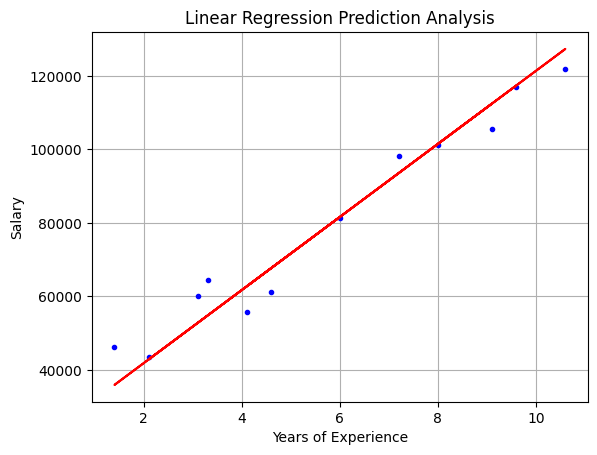

In [20]:
plt.plot(test_set['YearsExperience'], test_set['Salary'], "b.")
plt.plot(years_of_exp_testingSet, y_predicted, "r-")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Prediction Analysis")
plt.grid(visible=True)
plt.show()

# Comparision with sklearn's LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set[['YearsExperience']], train_set[['Salary']])
print(lin_reg.intercept_, lin_reg.coef_)

[22010.657045] [[9939.17656152]]


In [22]:
lin_reg_predictions = lin_reg.predict(test_set[['YearsExperience']])

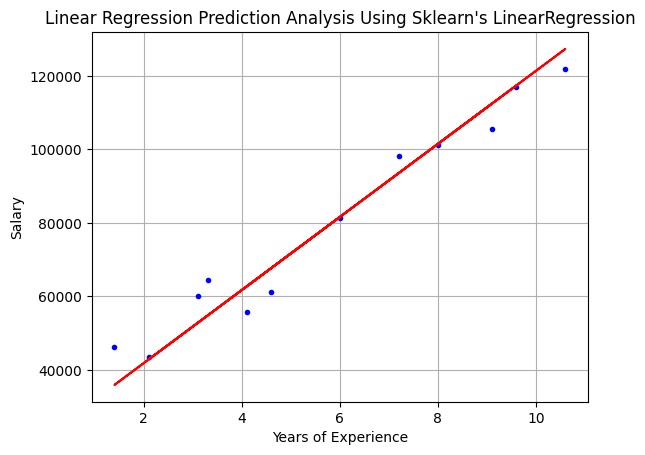

In [23]:
plt.plot(test_set['YearsExperience'], test_set['Salary'], "b.")
plt.plot(years_of_exp_testingSet, lin_reg_predictions, "r-")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Prediction Analysis Using Sklearn's LinearRegression")
plt.grid(visible=True)
plt.show()

# Gradient Descent Approach

In [24]:
train_set_copy.size

54

In [25]:
eta = 0.01  # learning rate
epoches = 1000  # decides how many time entire dataset is used.
m = len(years_of_exp_matrix)   # Size of data
rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2,1))   # randomly generated theta

In [26]:
theta

array([[ 0.30471708],
       [-1.03998411]])

In [27]:
print(len(years_of_exp_matrix))
print(years_of_exp_matrix)
print(salary.shape)

18
[[ 1.   5. ]
 [ 1.   1.6]
 [ 1.   4.2]
 [ 1.   6.9]
 [ 1.  10.4]
 [ 1.   5.2]
 [ 1.   8.8]
 [ 1.   3.8]
 [ 1.   9.7]
 [ 1.   3. ]
 [ 1.   4.1]
 [ 1.   1.2]
 [ 1.   6.1]
 [ 1.   8.3]
 [ 1.   3.3]
 [ 1.   5.4]
 [ 1.   4. ]
 [ 1.   2.3]]
(18,)


In [28]:
# for epoch in range (epoches):
#     gradients = 2 / m * years_of_exp_matrix.T @ (years_of_exp_matrix @ theta - salary)
#     theta = theta - eta * gradients

from sklearn.linear_model import SGDRegressor

In [ ]:
gradient = SGDRegressor(max_iter= epoches,
                        learning_rate='constant',
                        eta0=eta,
                        penalty=None,
                        shuffle=False)

gradient.fit(years_of_exp_matrix, salary)


,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",False
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [33]:
print(gradient.intercept_, gradient.coef_)
theta0 = gradient.coef_[0]
theta1 = gradient.coef_[1]

[10360.28230788] [10360.28230788 10872.57438427]


In [ ]:
predict_for = 8.0
y = theta0 + theta1 * predict_for
print(y)
print(test_set)     # getting high error

97340.87738200797
    Unnamed: 0  YearsExperience    Salary
26          26              9.6  116970.0
3            3              2.1   43526.0
8            8              3.3   64446.0
29          29             10.6  121873.0
11          11              4.1   55795.0
14          14              4.6   61112.0
18          18              6.0   81364.0
6            6              3.1   60151.0
1            1              1.4   46206.0
21          21              7.2   98274.0
25          25              9.1  105583.0
22          22              8.0  101303.0
